In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Load the data
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
train.info()
y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
N_train = len(X_train)
N_test = len(test)

print("Size of training set: ", N_train)
print("Size of test set: ", N_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Size of training set:  891
Size of test set:  418


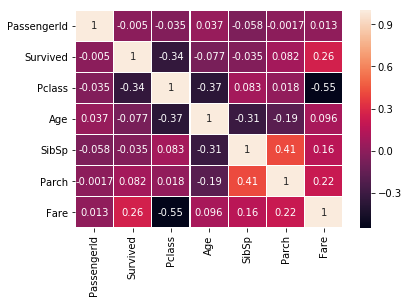

In [3]:
#EDA

train.corr()
sns.heatmap(train.corr(), annot=True, linewidths=.2)

In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


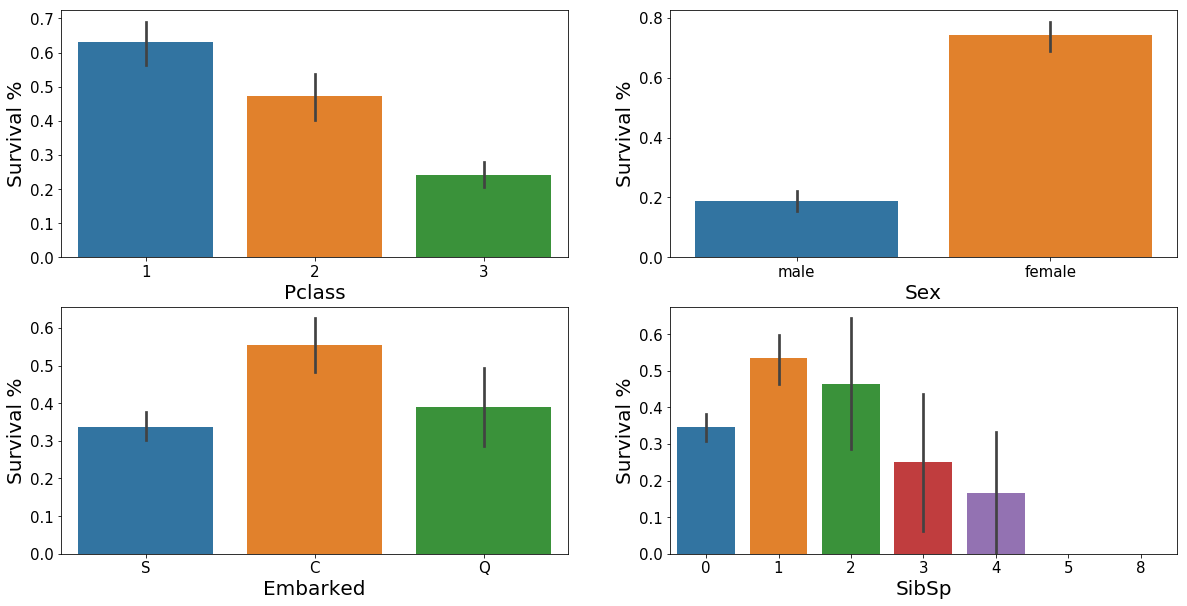

In [5]:
#Look at a few features and how they relate to Survived

fig1 = plt.figure(figsize = (20,10))
plt.subplot(2, 2, 1)
a = sns.barplot(x=X_train['Pclass'], y=y_train)
a.set_xlabel('Pclass', fontsize=20)
a.set_ylabel('Survival %', fontsize=20)
a.tick_params(labelsize=15)

plt.subplot(2, 2, 2)
b = sns.barplot(x=X_train['Sex'], y=y_train)
b.set_xlabel('Sex', fontsize=20)
b.set_ylabel('Survival %', fontsize=20)
b.tick_params(labelsize=15)

plt.subplot(2, 2, 3)
c = sns.barplot(x=X_train['Embarked'], y=y_train)
c.set_xlabel('Embarked', fontsize=20)
c.set_ylabel('Survival %', fontsize=20)
c.tick_params(labelsize=15)

plt.subplot(2, 2, 4)
d = sns.barplot(x=X_train['SibSp'], y=y_train)
d.set_xlabel('SibSp', fontsize=20)
d.set_ylabel('Survival %', fontsize=20)
d.tick_params(labelsize=15)

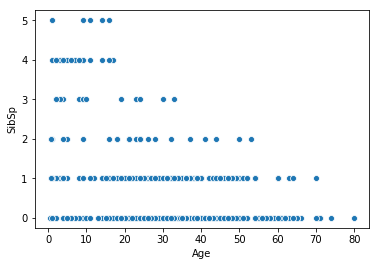

In [6]:
sns.scatterplot(x = 'Age', y = 'SibSp', data = train)

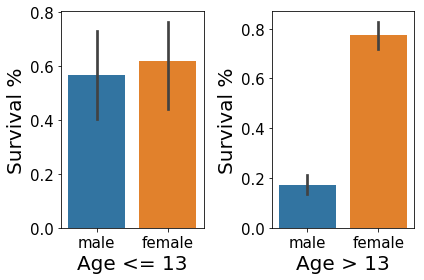

In [7]:
#Clearly, Sex is correlated to Survived. But how does it depend on age?

fig2, ax = plt.subplots(1,2)
n = 13
a = sns.barplot(x=train[train['Age']<=n]['Sex'], y=train[train['Age']<=n]['Survived'], ax=ax[0])
a.set_xlabel(f'Age <= {n}', fontsize=20)
a.set_ylabel('Survival %', fontsize=20)
a.tick_params(labelsize=15)

b = sns.barplot(x=train[train['Age']>n]['Sex'], y=train[train['Age']>n]['Survived'], ax=ax[1])
b.set_xlabel(f'Age > {n}', fontsize=20)
b.set_ylabel('Survival %', fontsize=20)
b.tick_params(labelsize=15)

plt.tight_layout()


In [8]:
#Children have about the same survival chance independent of Sex, but adult males have
#much lower chance of survival than adult femals. This makes sense because women and
#children were the first allowed onto the lifeboats.

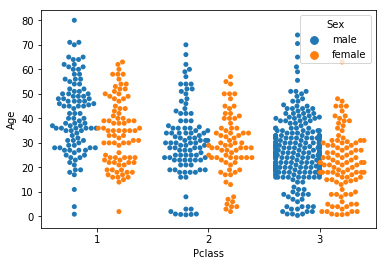

In [9]:
sns.swarmplot(x='Pclass', y='Age',hue='Sex', dodge = True, data = train)

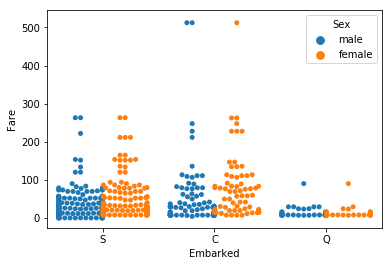

In [10]:
sns.swarmplot(y='Fare', x='Embarked',hue='Sex', dodge = True, data = train)

In [11]:
#Lets move to cleaning the data
#Check if data is too skewed
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
#Slightly skewed, but not terrible, same order of magnitude 1 vs 0.

In [13]:
#Look for missing data
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#as a percentage of total data
X_train.isnull().sum()/len(train)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [16]:
print("Number of unique Cabin entries:", X_train['Cabin'].nunique())
print("Total Cabin entries:", len(X_train['Cabin'].dropna()))

Number of unique Cabin entries: 147
Total Cabin entries: 204


In [17]:
#>77% of Cabin column missing, and many categories, drop it
X_train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
X_train.isnull().sum()/len(train)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

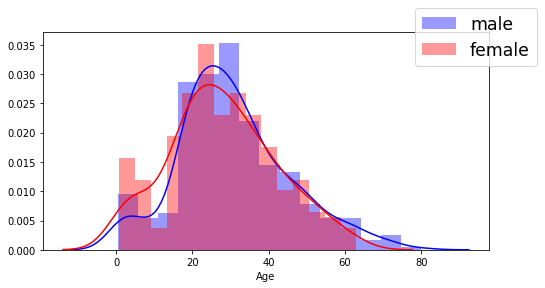

In [18]:
# Now to age...missing 20%, so should definitely get some insights
# Let's look at age distribution:

fig = plt.figure(figsize=(8,4))
sns.distplot(X_train[X_train['Sex']=='male']['Age'].dropna(), color = 'blue', bins=15)
sns.distplot(X_train[X_train['Sex']=='female']['Age'].dropna(), color = 'red', bins=15)
fig.legend(labels=['male','female'], loc = 1, fontsize = 'xx-large')

In [19]:
#Check how each feature is correlated to Age

train.corr()['Age'].sort_values()

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Survived      -0.077221
PassengerId    0.036847
Fare           0.096067
Age            1.000000
Name: Age, dtype: float64

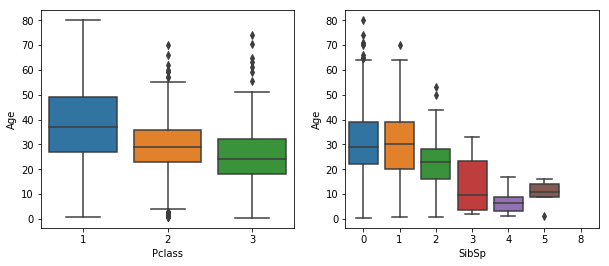

In [20]:
# Highest absolute correlation to Age is Pclass and SibSp
# Let's look at boxplots of each with Age:

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
sns.boxplot(x = 'Pclass', y = 'Age', data = X_train, ax = axes[0])
sns.boxplot(x = 'SibSp', y = 'Age', data = X_train, ax = axes[1])

In [21]:
#If you have more than 1 Sib or Sp, that means you are a family with kids, so the higher the
#SibSp, the higher chance you are a child.

In [22]:
#What is happening with the 8 SibSp?

X_train[X_train['SibSp']==8]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
180,181,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
201,202,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
324,325,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
846,847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


In [23]:
#Looks like they are all in the same family, with name "Sage" and none of them have an age..

In [24]:
test[test.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
X_train[['Age','Pclass','SibSp']].groupby(['Pclass','SibSp']).agg({'Age': ['mean', 'count']})


Age      
                   mean count
Pclass SibSp                 
1      0      39.181416   113
       1      37.414154    65
       2      37.200000     5
       3      22.000000     3
2      0      31.934220   109
       1      27.363636    55
       2      19.125000     8
       3      30.000000     1
3      0      27.630201   249
       1      24.912698    63
       2      18.875000    12
       3       8.875000     8
       4       7.055556    18
       5      10.200000     5
       8            NaN     0

In [26]:
#Impute Age by SibSp and Pclass

impute_df = X_train[['Age','Pclass','SibSp']].groupby(['Pclass','SibSp']).mean().reset_index().copy()

def impute_age(df):
    if pd.isnull(df['Age']):
        Pclass = df['Pclass']
        SibSp = df['SibSp']
        return float(impute_df[(impute_df['Pclass']==Pclass) & (impute_df['SibSp']==SibSp)]['Age'])
    else:
        return df['Age']


test['Age'] = test[['Age','Pclass','SibSp']].apply(impute_age, axis=1)
X_train['Age'] = X_train[['Age','Pclass','SibSp']].apply(impute_age, axis=1)

#X_train['Age'] = X_train.groupby(['Pclass','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
X_train.isnull().sum()/len(train)*100

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.785634
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [27]:
#Impute the Sage family of 8 siblings and Pclass=3 as if SibSp = 5:
X_train['Age'] = X_train['Age'].transform(lambda x: x.fillna(10.2))
print(X_train.iloc[159])
X_train.isnull().sum()/len(train)*100

PassengerId                           160
Pclass                                  3
Name           Sage, Master. Thomas Henry
Sex                                  male
Age                                  10.2
SibSp                                   8
Parch                                   2
Ticket                           CA. 2343
Fare                                69.55
Embarked                                S
Name: 159, dtype: object


PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [28]:
#Find indeces with missing data in the Embarked column
inds = pd.isnull(X_train).any(1).to_numpy().nonzero()[0].tolist()
inds

[61, 829]

In [29]:
#With only two data point, we can remove those data points
X_train.drop(index = inds, inplace = True)
y_train.drop(index = inds, inplace = True)
print("X-train shape:" + str(X_train.shape))
print("y-train shape:" + str(y_train.shape))
X_train.isnull().sum()

X-train shape:(889, 10)
y-train shape:(889,)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
#fill remaining test NaN
print("X-test shape:" + str(test.shape))
test.isnull().sum()

X-test shape:(418, 10)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [31]:
test[test.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,S


In [32]:
#A single data point for age (from same Sage family) and Fare, so just impute median for Fare:

test['Age'] = test['Age'].transform(lambda x: x.fillna(10.2))

test['Fare'].fillna((test['Fare'].median()), inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
#Now deal with categorical data (objects):
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [34]:
#Have to deal with Name, Sex, Ticket, Embarked

print(X_train['Ticket'].nunique())
X_train['Ticket'].value_counts().head(15)

680


CA. 2343        7
1601            7
347082          7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
LINE            4
2666            4
113781          4
113760          4
PC 17757        4
347077          4
19950           4
Name: Ticket, dtype: int64

In [35]:
#Way too many Ticket categories, and it's not clear what they mean, so drop
X_train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [36]:
#Maybe could learn something from Name titles (Mr., Miss., Master, etc.), but not clear, so drop
X_train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [37]:
print("training sexes: ", X_train['Sex'].nunique())
print("training embarked: ", X_train['Embarked'].nunique())
print("test sexes: ", test['Sex'].nunique())
print("test embarked: ", test['Embarked'].nunique())

training sexes:  2
training embarked:  3
test sexes:  2
test embarked:  3


In [38]:
#Can one hot encode Sex and Embarked

sex = pd.get_dummies(X_train['Sex'],drop_first=True)
embark = pd.get_dummies(X_train['Embarked'],drop_first=True)

sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

X_train.drop(['Sex','Embarked'],axis=1,inplace=True)
X_train = pd.concat([X_train,sex,embark],axis=1)

test.drop(['Sex','Embarked'],axis=1,inplace=True)
test = pd.concat([test,sex_test,embark_test],axis=1)


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [40]:
#Now ready to build model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train2, X_val, y_train2, y_val = train_test_split(X_train, 
                                                    y_train, test_size=0.30, 
                                                    random_state=1)


logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train2,y_train2)
logpredictions = logmodel.predict(X_val)
#Logmodel should be worse because we haven't scaled/normalized the data

forestmodel = RandomForestClassifier(n_estimators=200)
forestmodel.fit(X_train2,y_train2)
forestpredictions = forestmodel.predict(X_val)

xgbmodel = XGBClassifier(n_estimators=30, learning_rate=0.001, random_state=0)
xgbmodel.fit(X_train2,y_train2)
xgbpredictions = xgbmodel.predict(X_val)

print("log accuracy ", accuracy_score(y_val,logpredictions))
print("forest accuracy ", accuracy_score(y_val, forestpredictions))
print("xgb accuracy ", accuracy_score(y_val, xgbpredictions))

log accuracy  0.8277153558052435
forest accuracy  0.8426966292134831
xgb accuracy  0.8576779026217228


In [41]:
xgbmodel.fit(X_train, y_train)
predictions = pd.DataFrame(xgbmodel.predict(test))
predictions = pd.concat([test['PassengerId'],predictions], axis = 1)
predictions

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
# Save test predictions to file

# predictions.to_csv('submission.csv', index=False)